In [2]:
!pip install torchvision

In [3]:
import numpy as np
import torch
from torchvision.datasets import mnist # 导入 pytorch 内置的 mnist 数据
from torch import nn
from torch.autograd import Variable

In [4]:
train_set = mnist.MNIST('./data', train=True, download=True)
test_set = mnist.MNIST('./data', train=False, download=True)

0.3%

100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



102.8%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



112.7%

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [12]:
a_data,a_label = train_set[7]
a_data

In [14]:
a_data = np.array(a_data, dtype='float32')#类型转换为array
print(a_data.shape)
print(a_data)

(28, 28)
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  38.  43. 105.
  255. 253. 253. 253. 253. 253. 174.   6.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.  43. 139. 224. 226. 252.
  253. 252. 252. 252. 252. 252. 252. 158.  14.   

随后进行数据预处理，将其标准化后拉平为一维向量。随后将数据集重新载入
注意这里载入的前后语句有所不同。

In [15]:
def data_tf(x):
    x = np.array(x,dtype='float32')/255
    x = (x-0.5)/0.5
    x = x.reshape((-1,))
    x = torch.from_numpy(x)
    return x
train_set = mnist.MNIST('./data', train=True, transform=data_tf, download=True) 
test_set = mnist.MNIST('./data', train=False, transform=data_tf, download=True)

In [16]:
a,a_label = train_set[0]
print(a.shape)
print(a_label)

torch.Size([784])
5


In [17]:
from torch.utils.data import DataLoader
# 使用 pytorch 自带的 DataLoader 定义一个数据迭代器
#将自定义的Dataset根据batch size大小、是否shuffle等封装成一个Batch Size大小的Tensor，用于后面的训练。
train_data = DataLoader(train_set, batch_size=64, shuffle=True)
test_data = DataLoader(test_set, batch_size=128, shuffle=False)

In [19]:
a,a_label = next(iter(train_data))
print(a.shape)
print(a_label.shape)

torch.Size([64, 784])
torch.Size([64])


In [49]:
wangzhiyong_net = nn.Sequential(
    nn.Linear(784,700),
    nn.ReLU(),
    nn.Linear(700,600),
    nn.ReLU(),
    nn.Linear(600,500),
    nn.ReLU(),
    nn.Linear(500,400),
    nn.ReLU(),
    nn.Linear(400,200),
    nn.ReLU(),
    nn.Linear(200,10)
    #注意由于为十分类，最后的输出维度为10
)

In [50]:
wangzhiyong_net

Sequential(
  (0): Linear(in_features=784, out_features=700, bias=True)
  (1): ReLU()
  (2): Linear(in_features=700, out_features=600, bias=True)
  (3): ReLU()
  (4): Linear(in_features=600, out_features=500, bias=True)
  (5): ReLU()
  (6): Linear(in_features=500, out_features=400, bias=True)
  (7): ReLU()
  (8): Linear(in_features=400, out_features=200, bias=True)
  (9): ReLU()
  (10): Linear(in_features=200, out_features=10, bias=True)
)

In [51]:
#设置损失函数以及参数优化方式(随机梯度下降)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(wangzhiyong_net.parameters(),1e-1)

In [52]:
losses = []
acces = []
eval_losses = []
eval_acces = []
for e in range(20):
    train_loss = 0
    train_acc = 0
    wangzhiyong_net.train()#开始训练模型
    for im,label in train_data:
        im = Variable(im)
        label = Variable(label)
        #前向传播
        out = wangzhiyong_net(im)
        loss = criterion(out,label)
        #反向传播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #用下划线来表示不关心的类别
        train_loss += loss.item()
        _, pred = out.max(1)#给出一张图片对应每种类别的概率的最大值的索引，即为该张图片所属的类别
        #计算正确率
        num_correct = (pred == label).sum().item()
        acc = num_correct / im.shape[0]
        train_acc += acc
    losses.append(train_loss / len(train_data))
    acces.append(train_acc / len(train_data)) 
    eval_loss = 0
    eval_acc = 0
    wangzhiyong_net.eval() #开始测试模型
    for im, label in test_data:
        im = Variable(im)
        label = Variable(label)
        out = wangzhiyong_net(im)
        loss = criterion(out, label)
        # 记录误差
        eval_loss += loss.item()
        # 记录准确率
        _, pred = out.max(1)
        num_correct = (pred == label).sum().item()
        acc = num_correct / im.shape[0]
        eval_acc += acc
    eval_losses.append(eval_loss / len(test_data))
    eval_acces.append(eval_acc / len(test_data))
    print('epoch: {}, Train Loss: {:.6f}, Train Acc: {:.6f}, Eval Loss: {:.6f}, Eval Acc: {:.6f}'
          .format(e, train_loss / len(train_data), train_acc / len(train_data), 
                     eval_loss / len(test_data), eval_acc / len(test_data)))

epoch: 0, Train Loss: 0.828121, Train Acc: 0.716285, Eval Loss: 0.284289, Eval Acc: 0.908228
epoch: 1, Train Loss: 0.187418, Train Acc: 0.942614, Eval Loss: 0.166111, Eval Acc: 0.950455
epoch: 2, Train Loss: 0.128779, Train Acc: 0.960588, Eval Loss: 0.182619, Eval Acc: 0.941357
epoch: 3, Train Loss: 0.097299, Train Acc: 0.970099, Eval Loss: 0.091751, Eval Acc: 0.972112
epoch: 4, Train Loss: 0.074751, Train Acc: 0.976996, Eval Loss: 0.147619, Eval Acc: 0.955597
epoch: 5, Train Loss: 0.064189, Train Acc: 0.979861, Eval Loss: 0.116745, Eval Acc: 0.966278
epoch: 6, Train Loss: 0.053928, Train Acc: 0.982693, Eval Loss: 0.102205, Eval Acc: 0.969146
epoch: 7, Train Loss: 0.046535, Train Acc: 0.984958, Eval Loss: 0.083942, Eval Acc: 0.976464
epoch: 8, Train Loss: 0.036922, Train Acc: 0.987990, Eval Loss: 0.077681, Eval Acc: 0.976958
epoch: 9, Train Loss: 0.031098, Train Acc: 0.990005, Eval Loss: 0.092831, Eval Acc: 0.974090
epoch: 10, Train Loss: 0.038933, Train Acc: 0.988456, Eval Loss: 0.077

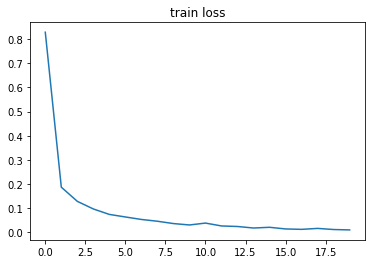

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('train loss')
plt.plot(np.arange(len(losses)),losses)

Text(0.5, 1.0, 'train acc')

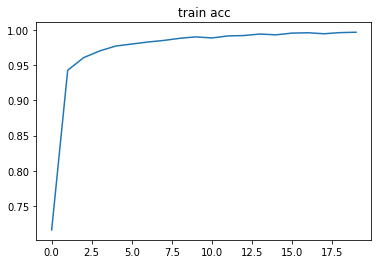

In [54]:
plt.plot(np.arange(len(acces)), acces)
plt.title('train acc')

Text(0.5, 1.0, 'test loss')

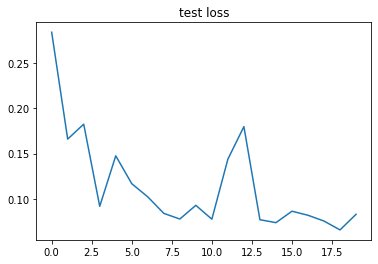

In [55]:
plt.plot(np.arange(len(eval_losses)), eval_losses)
plt.title('test loss')

Text(0.5, 1.0, 'test acc')

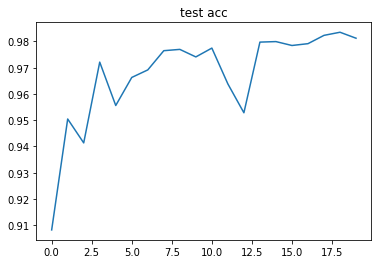

In [56]:
plt.plot(np.arange(len(eval_acces)), eval_acces)
plt.title('test acc')